In [86]:
import wandb
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt

import functools
import rich
import rich.rule

In [112]:
def sep(*, title, text_color="green", line_color="green"):
    # Plot just a line with no axis
    plt.figure(dpi=600, figsize=(10, 0.3))
    if title:
        # Add text despite the fact that the axis are off
        axis = plt.gca()
        axis.text(0.5, 0.1, title, ha='center', va='center', fontsize=15, color=text_color)
    plt.plot([0, 1], [0, 0], color=line_color)
    plt.axis("off")
    plt.show()

def get_run_id(url):
    if "wandb.ai" in url:
        start = url.find("wandb.ai/") + len("wandb.ai/")
        assert start >= 0, (start, url)
        started = url[start:]
    else:
        started = url

    assert "https" not in started, started
    assert started.startswith("julesgm"), started
    split = started.strip().split("/")

    if split[2] == "runs":
        stuff = [split[0], split[1], split[3]]
    else:
        stuff = [split[0], split[1], split[2]]

    stuff[2] = stuff[2].split("?", 1)[0]
    return "/".join(stuff)

def linear_smoothing(x, window_size, convolve_mode):
    window = np.ones(window_size) / window_size
    return np.convolve(x, window, convolve_mode)

@functools.lru_cache(maxsize=None)
def run_df(url):
    api = wandb.Api()
    run = api.run(get_run_id(url))
    return run, run.history()

In [130]:
def plot_key(df, title, axis_label, smoothing_n=20, convolve_mode="valid", max_=None):
    color = sns.color_palette("tab10")[0]
    plt.figure(dpi=200, figsize=(7, 3))
    plt.title(title)
    sns.lineplot(df, alpha=0.5, linewidth=0.5, color=color, label=axis_label)
    sns.lineplot(linear_smoothing(df, smoothing_n, convolve_mode), color=color, label=f"{axis_label} (Smoothed)")
    plt.xlabel("Step")
    if max_:
        plt.ylim(0, min(max_, df.max()))
    plt.legend()


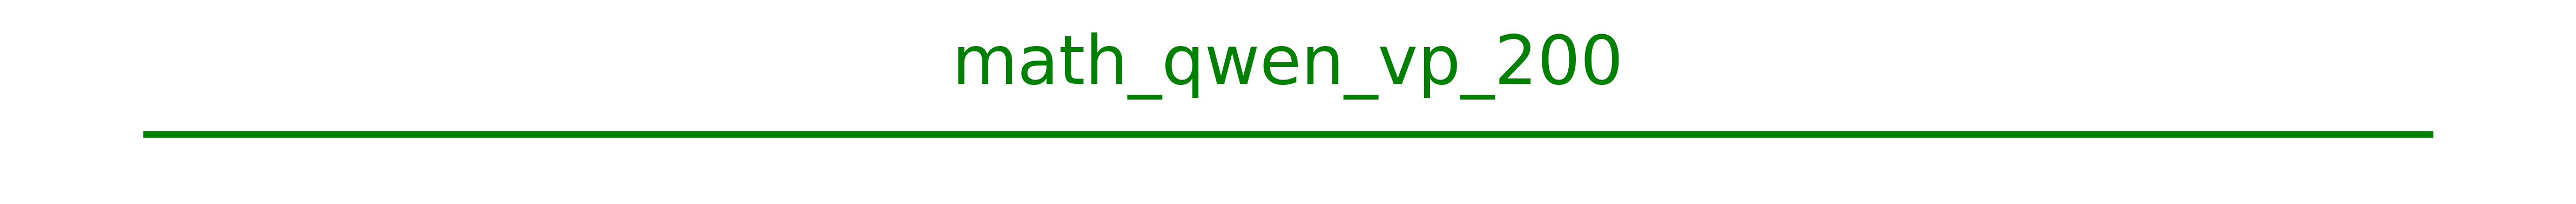

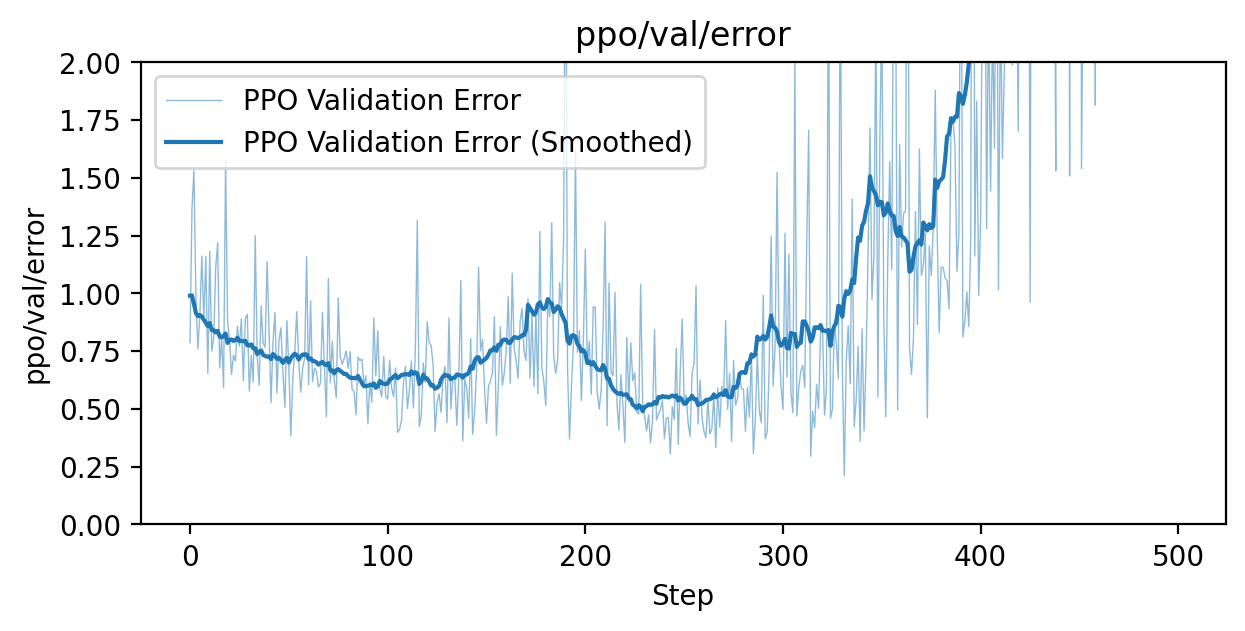

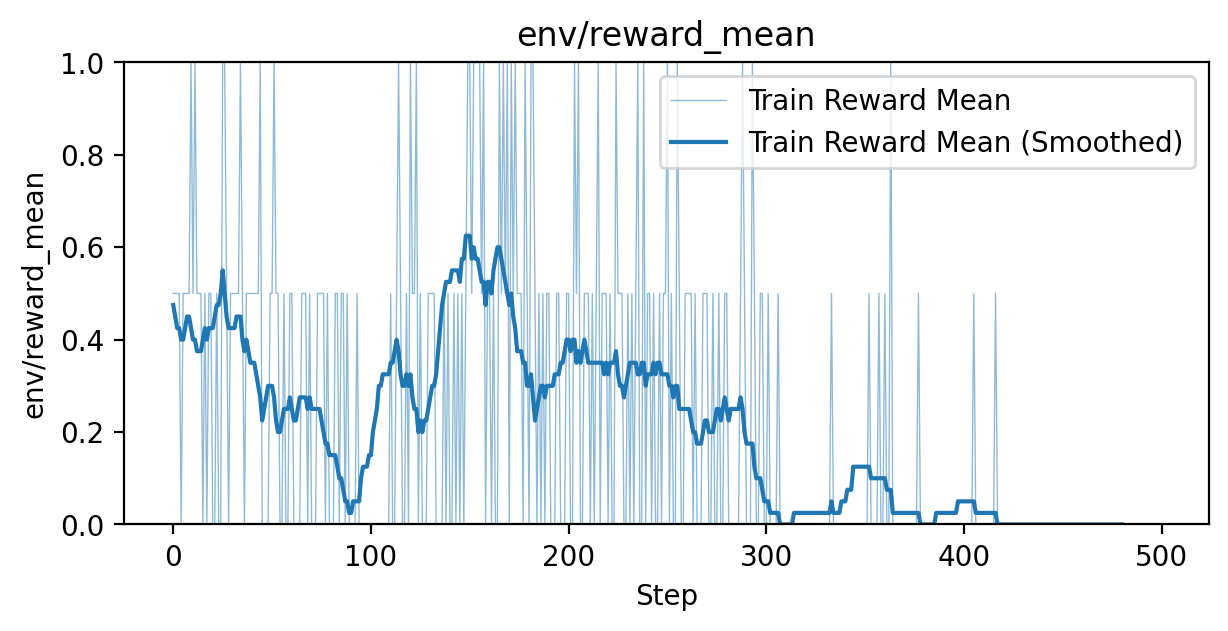

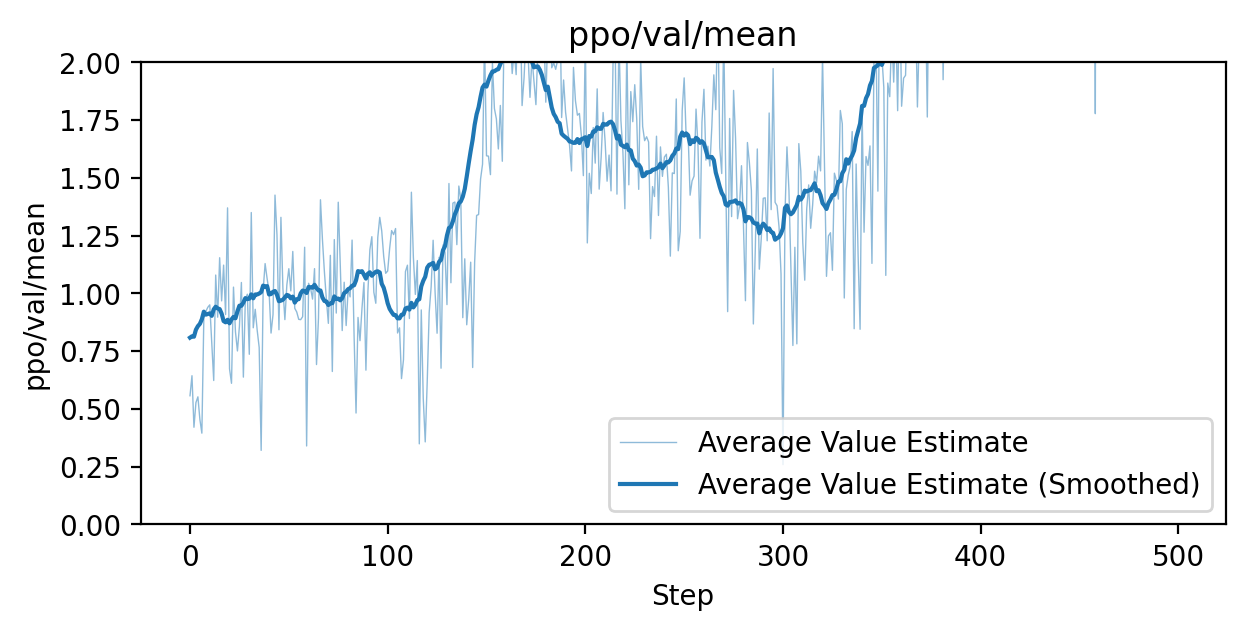

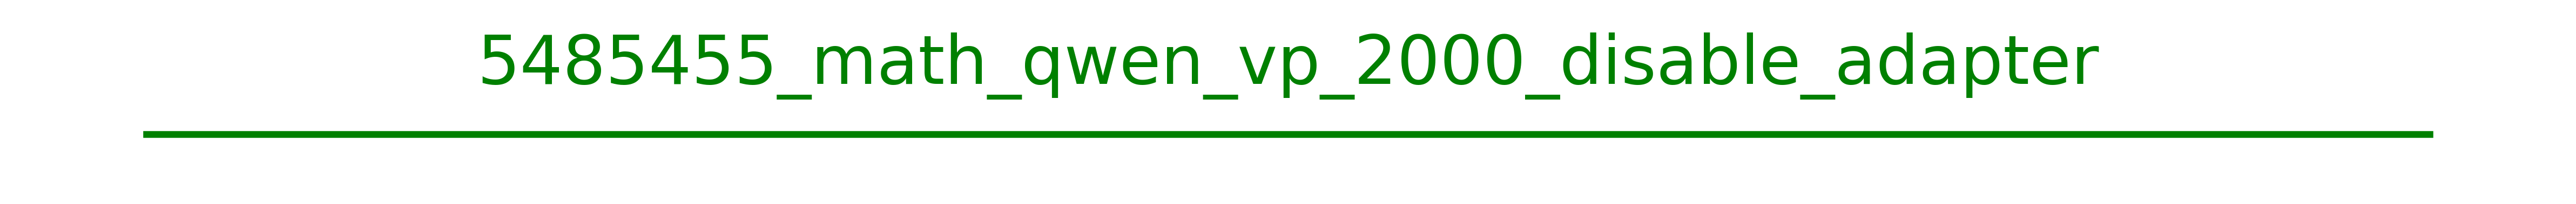

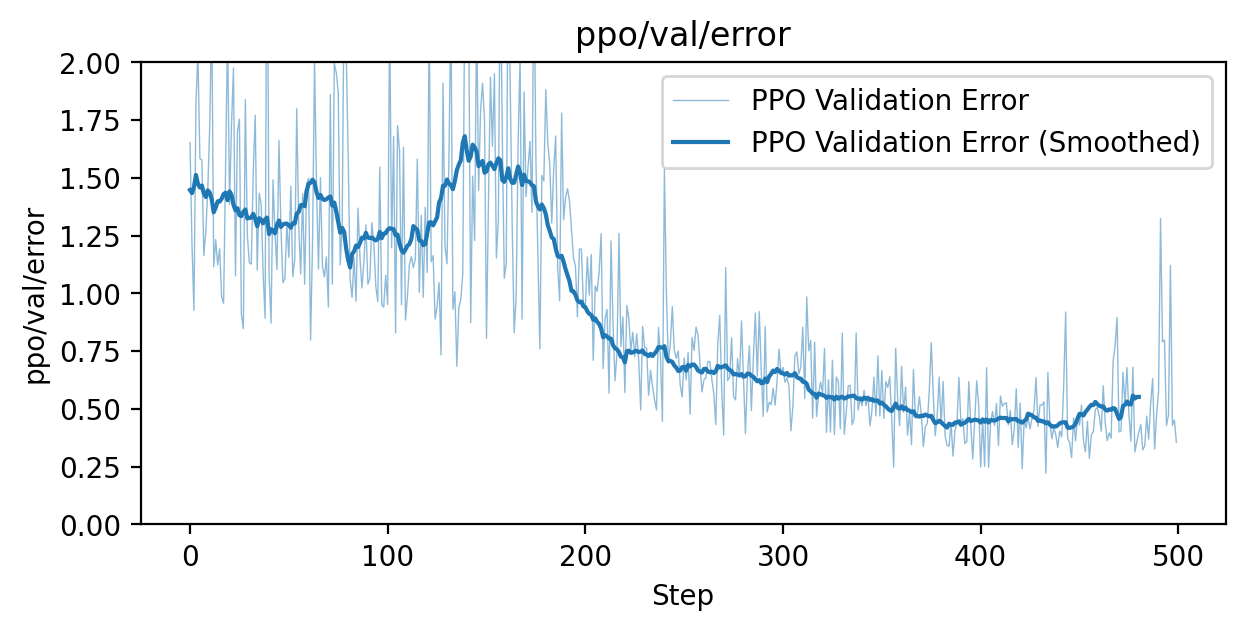

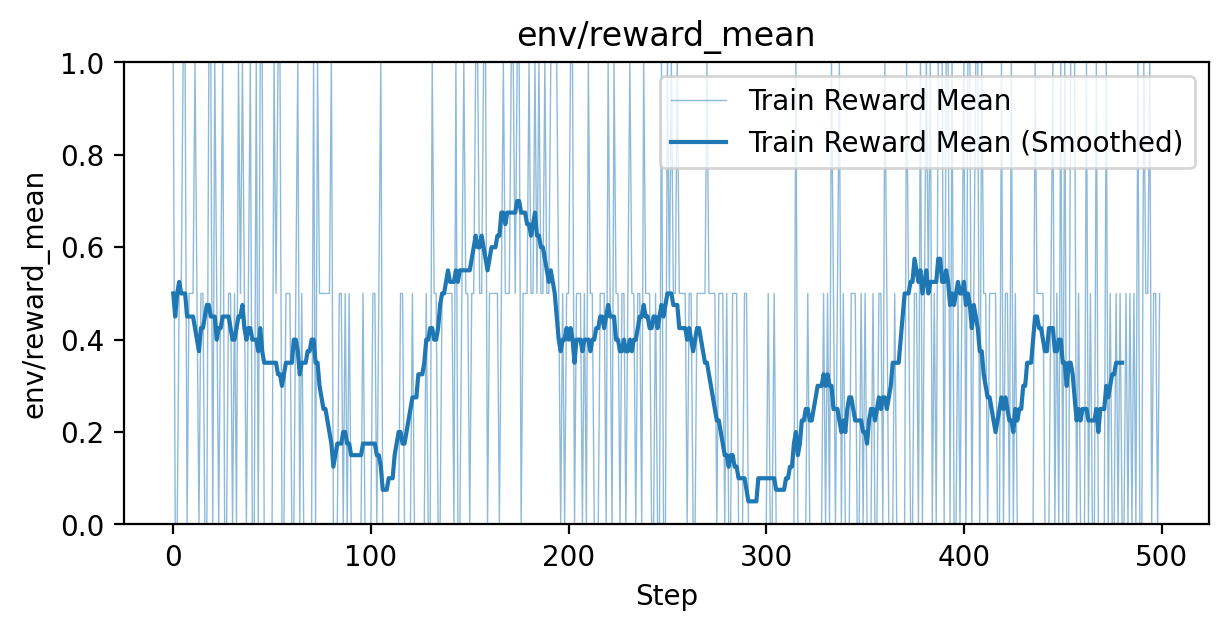

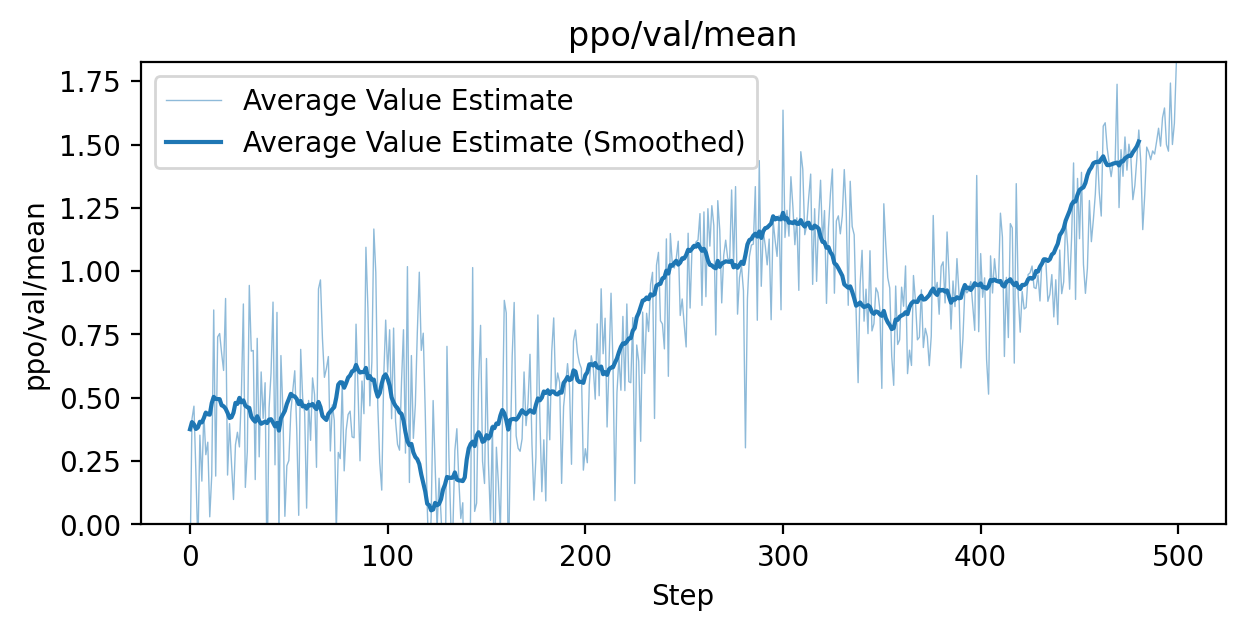

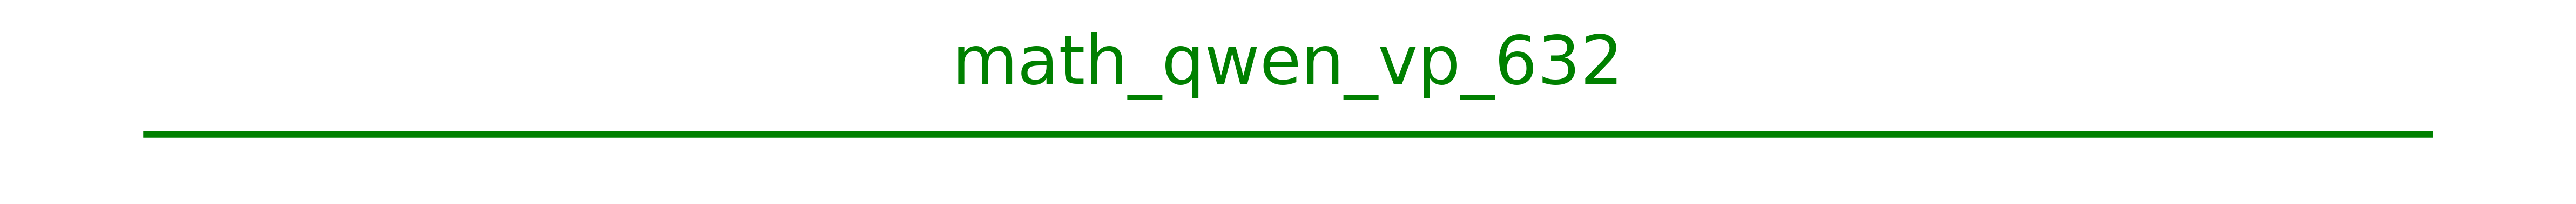

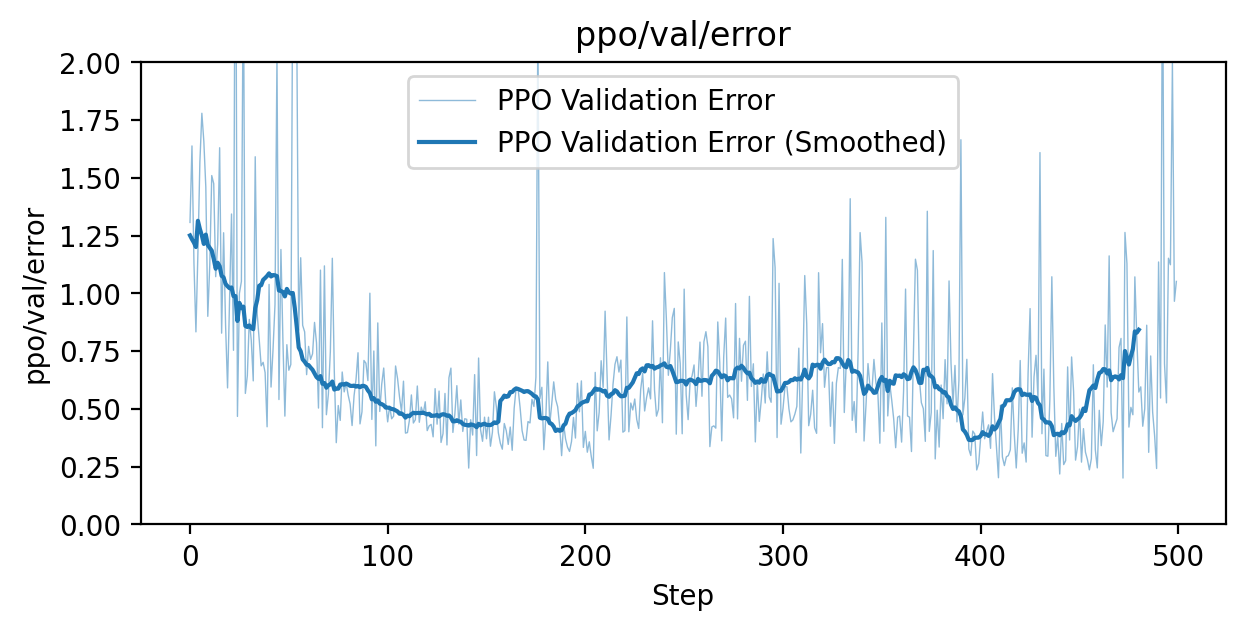

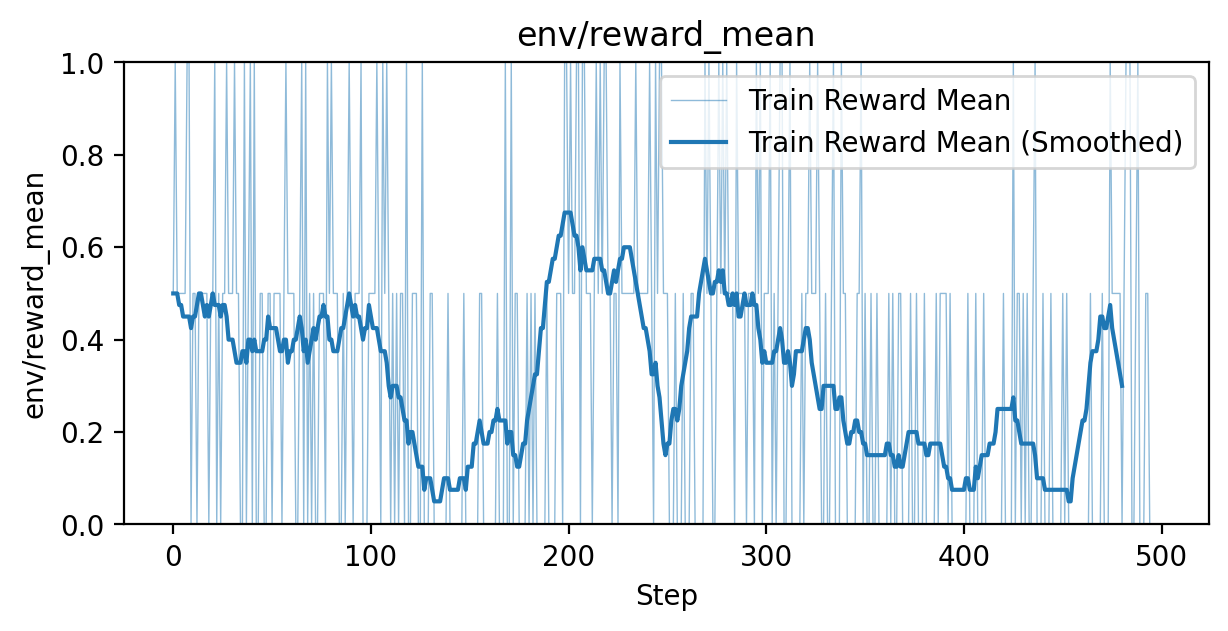

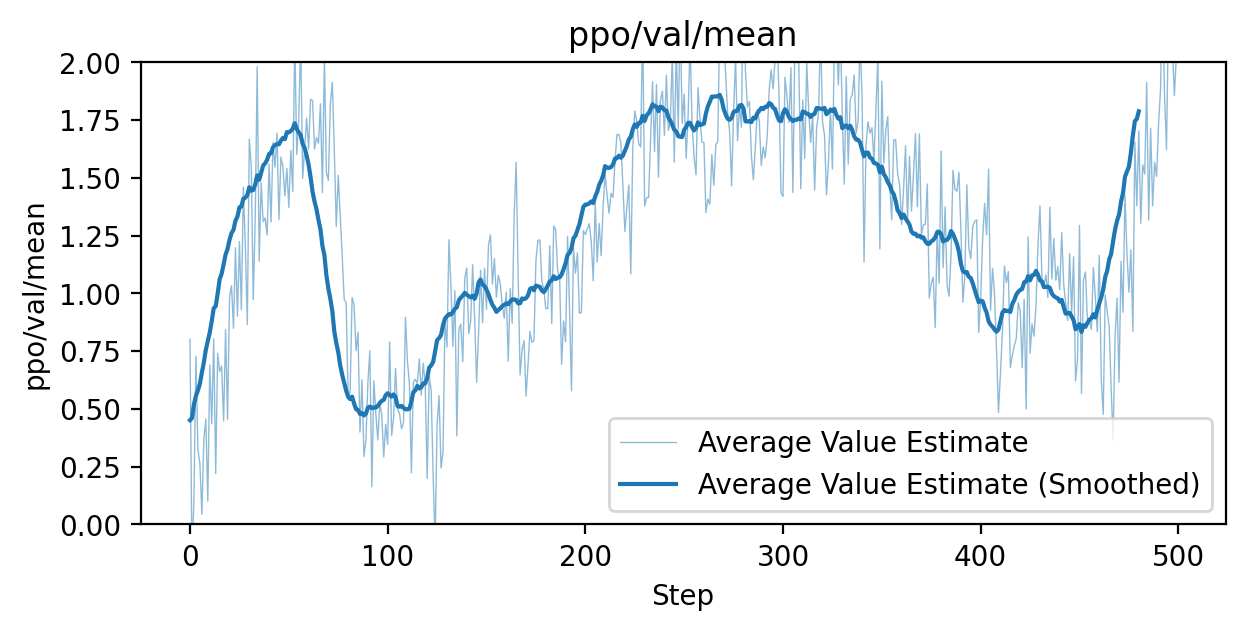

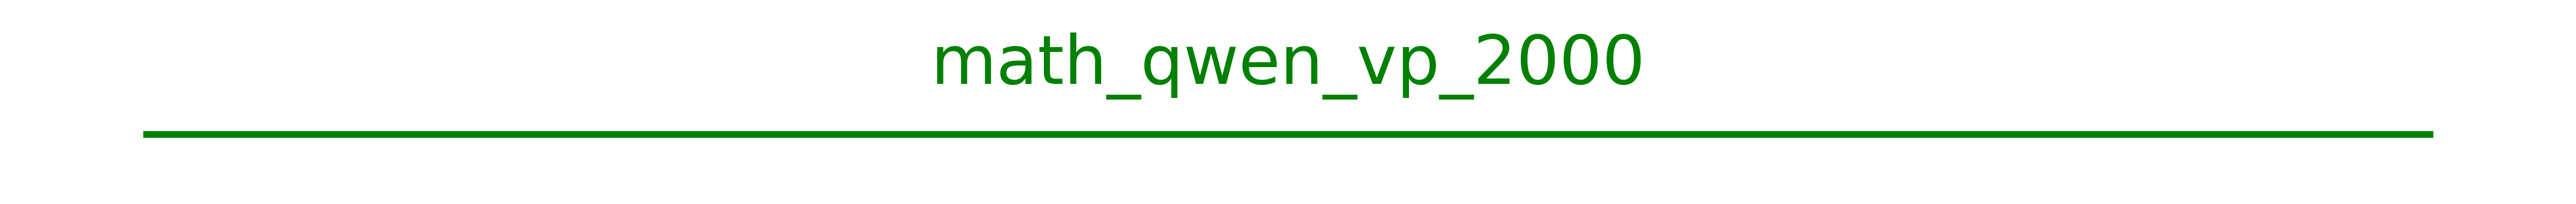

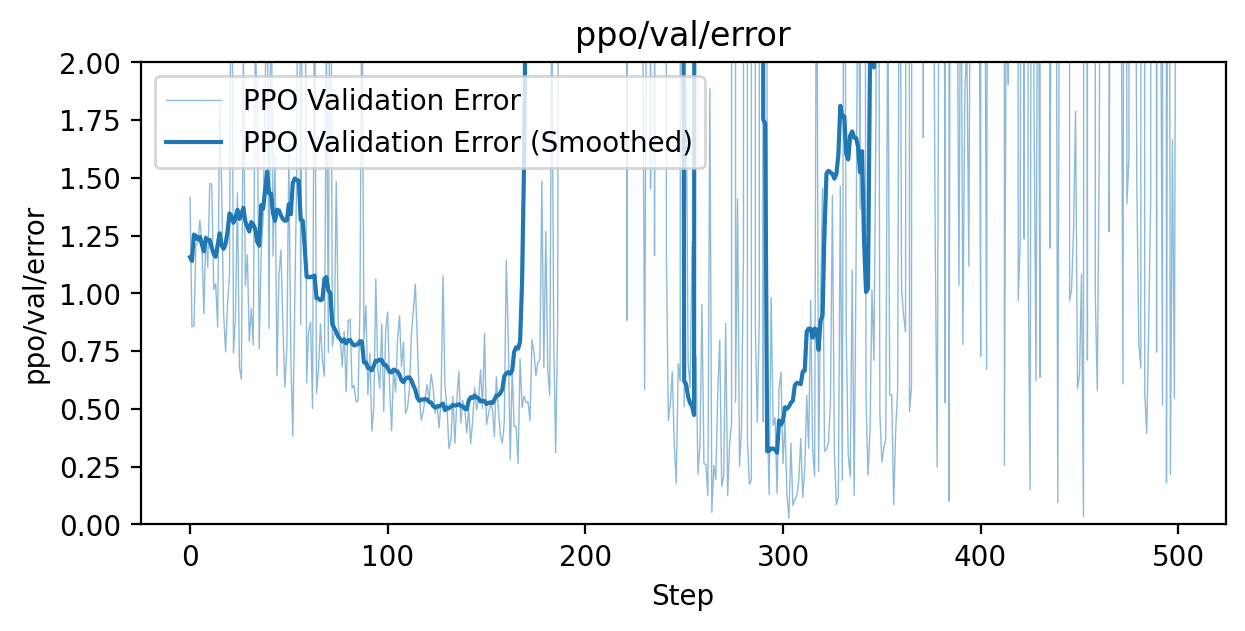

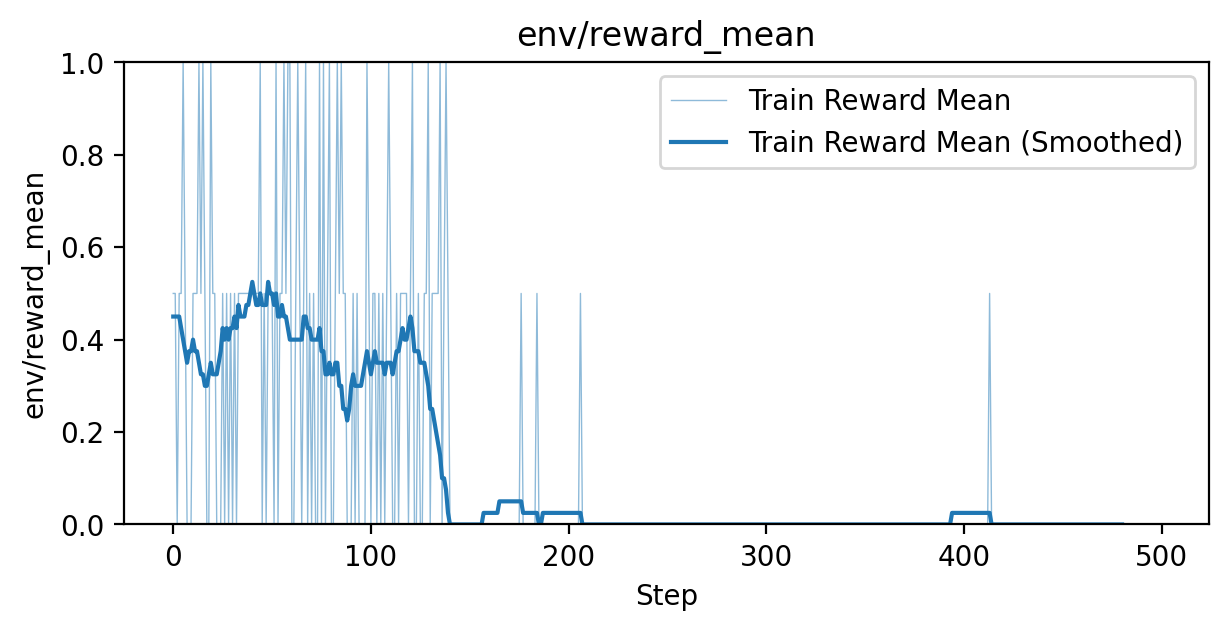

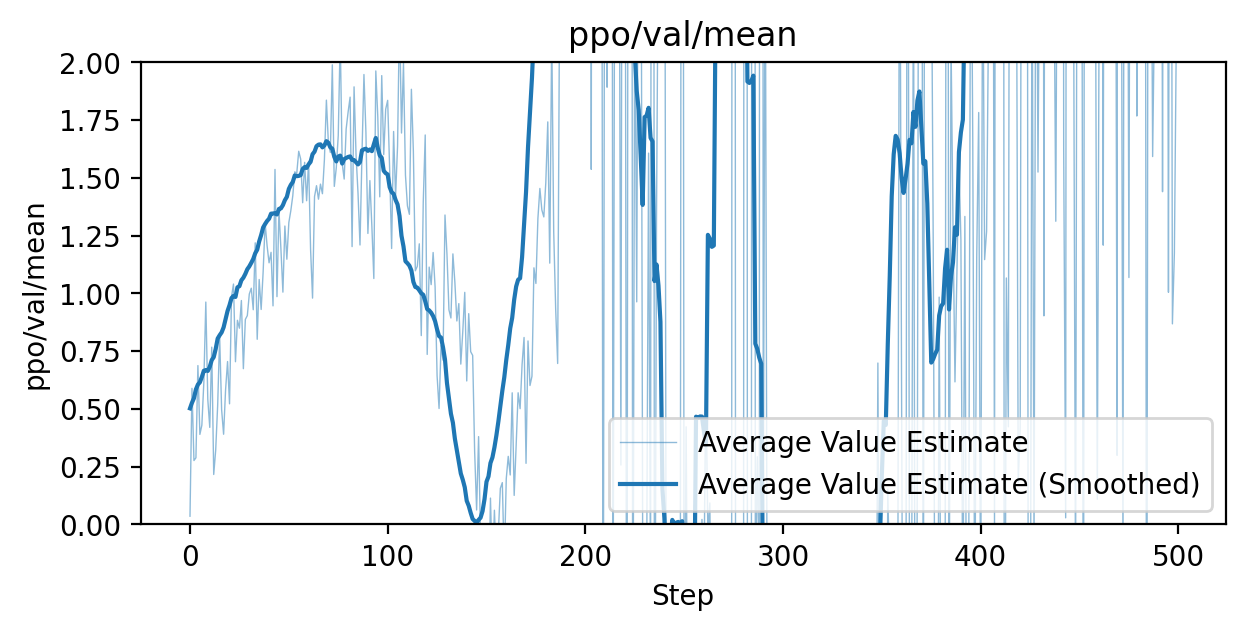

In [134]:
runs = [
    "https://wandb.ai/julesgm/rl_math/runs/587lqtaj/overview",
    "https://wandb.ai/julesgm/rl_math/runs/mii4f3id/overview",
    "https://wandb.ai/julesgm/rl_math/runs/muuhe55a?nw=nwuserjulesgm",
    "https://wandb.ai/julesgm/rl_math/runs/lw85ykin?nw=nwuserjulesgm",
    
]

keys = [
    ("ppo/val/error", "PPO Validation Error",  2),
    ("env/reward_mean", "Train Reward Mean", 10),
    ("ppo/val/mean", "Average Value Estimate", 2),
]

for run_path in runs:
    run, _run_df = run_df(run_path)
    sep(title=run.name)
    for key, axis_text, max_ in keys:
        plot_key(_run_df[key], key, axis_text, max_=max_)

